# This notebook generates figure 10, showing that the 150 keV points are statistically indifferent from other energies.

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

import sys, os, importlib, seaborn as sns, pandas as pd

outputDirectory = 'raw/'
parentDirectory = 'data/'
sys.path.append('../../../')
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation/')


import default_style as dfs

fpath = 'data/jmpdata.xlsx'
data = pd.read_excel(fpath)
data

,Unnamed: 0,dT,power,energy,tape,anneal,yn150keV,index
0,0,11.022526,35.626450,800,f20,1,0,81
1,1,9.051038,40.076030,2400,f20,1,0,82
2,2,9.572919,36.332321,150,f20,1,1,83
3,3,11.035730,35.366250,150,f20,1,1,84
4,4,10.980382,35.366250,150,f20,1,1,85
...,...,...,...,...,...,...,...,...
649,649,10.649352,153.971686,2400,f37,2,0,714
650,650,11.214077,98.596736,2400,f37,2,0,715
651,651,11.450762,96.167455,2400,f37,2,0,716
652,652,11.375656,96.622279,2400,f37,2,0,717


## Figure 10 description

This figure compares all four energies across tapes and anneal cycles by renormalizing the values to the slope of ffj28, and renormalizing the power to 36 mW (which is where most of the data was acquired). It shows that there are no statistical differences between the means if the distributions are assumed to be normal.

/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_98061/541787658.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(ydata, positions=[p], labels=[e], patch_artist=True, showfliers=False, boxprops=boxprops, medianprops=medianprops)
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_98061/541787658.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(ydata, positions=[p], labels=[e], patch_artist=True, showfliers=False, boxprops=boxprops, medianprops=medianprops)
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_98061/541787658.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped 

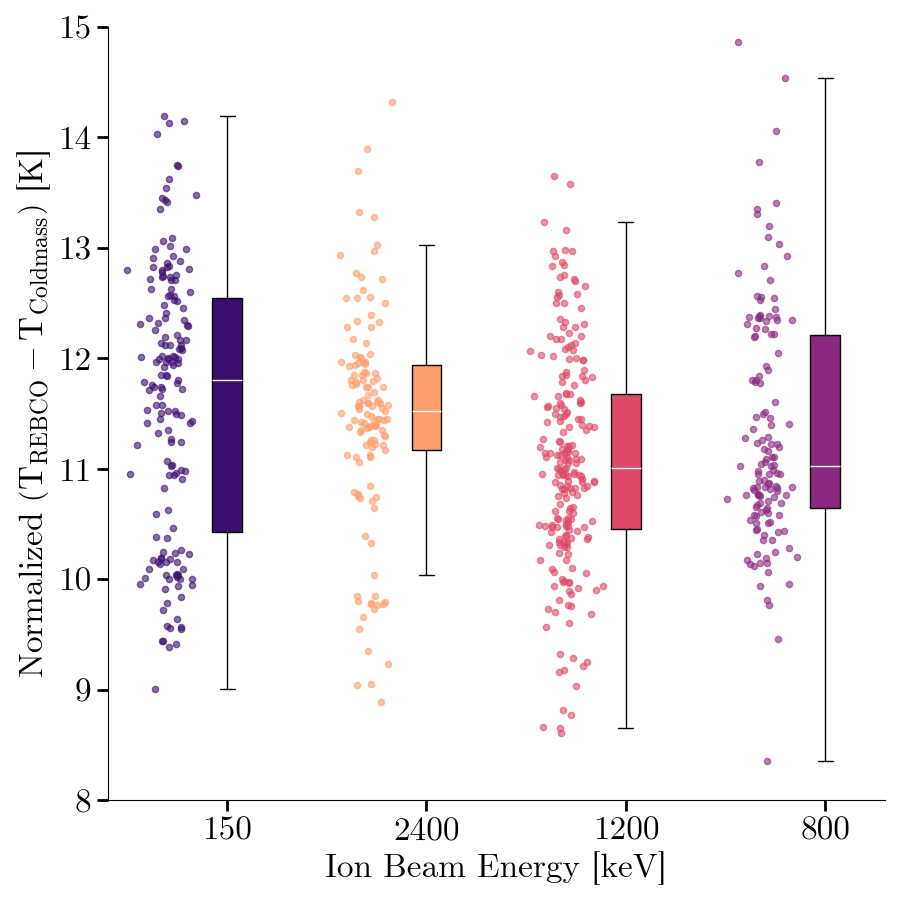

In [11]:
fig, ax = plt.subplots(1, 1)

y = data.dT

for e, p in zip([150, 2400, 1200, 800], [0, 1, 2, 3]):
    cut, c = (data.energy == e), dfs.colors_energies[str(e)]
    ydata = y[cut]
    boxprops = dict(facecolor=c)
    medianprops=dict(color='white', linewidth=1)
    ax.boxplot(ydata, positions=[p], labels=[e], patch_artist=True, showfliers=False, boxprops=boxprops, medianprops=medianprops)
    
    xjitter = np.random.normal(p-.3, 0.06, size=len(y[cut]))
    plt.scatter(xjitter, ydata, alpha=0.6, color=c, s=20)

ax.set_xlabel(r'Ion Beam Energy [keV]', color='k')
ax.set_ylabel(r'Normalized $\left(\mathrm{T_{REBCO} - T_{Coldmass}}\right)$ [K]', color='k')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks([])
ax.set_ylim(8, 15)
ax.set_xlim(-.6, 3+.3)
fig.tight_layout()

plt.savefig(outputDirectory+'energyBoxplots.svg', format='svg', transparent=True)